In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/tsla5.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-24,43.074001,44.200001,43.000000,43.650002,43.650002,12401500
1,2015-11-25,44.268002,46.166000,44.076000,45.928001,45.928001,19954000
2,2015-11-27,46.212002,46.450001,45.402000,46.321999,46.321999,9747000
3,2015-11-30,46.358002,46.855999,45.816002,46.051998,46.051998,13299000
4,2015-12-01,46.212002,47.599998,46.209999,47.438000,47.438000,18670000
...,...,...,...,...,...,...,...
1254,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300
1255,2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,78044000
1256,2020-11-19,492.000000,508.609985,487.570007,499.269989,499.269989,62475300
1257,2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32807300


In [ ]:
df = data.iloc[:,[4]].values
df

array([[ 43.650002],
       [ 45.928001],
       [ 46.321999],
       ...,
       [499.269989],
       [489.609985],
       [521.849976]])

In [ ]:
df_train = np.array(df[:int(df.shape[0]*0.7)])
df_test = np.array(df[int(df.shape[0]*0.7):])
print(df_train.shape)
print(df_test.shape)

(881, 1)
(378, 1)


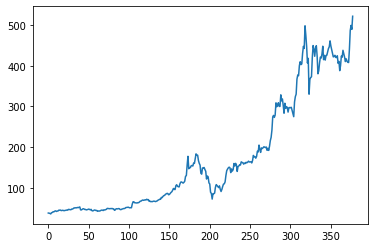

In [ ]:
plt.plot(df_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
df_train = scalar.fit_transform(df_train)
df_train.shape

(881, 1)

In [ ]:
x_train = df_train[0:880]
y_train = df_train[1:881]

x_train = np.reshape(x_train, (880,1,1))
x_train.shape

(880, 1, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
LSTMdeepmodel = Sequential()
LSTMdeepmodel.add(LSTM(100, return_sequences=True, input_shape=[None, 1]))
LSTMdeepmodel.add(LSTM(100))
LSTMdeepmodel.add(Dense(1))
LSTMdeepmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 100)         40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTMdeepmodel.compile(loss="mse", optimizer="adam")

In [ ]:
LSTMdeepmodel.fit(x_train, y_train, epochs=100, batch_size = 30)

Epoch 1/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2311
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 11/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 12/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 13/100
30/30 [=================

In [ ]:
print(df_test)
print(df_test.shape)

[[ 37.972   ]
 [ 37.644001]
 [ 37.032001]
 [ 35.793999]
 [ 38.720001]
 [ 39.318001]
 [ 41.189999]
 [ 40.900002]
 [ 42.576   ]
 [ 43.419998]
 [ 41.852001]
 [ 42.782001]
 [ 42.984001]
 [ 45.006001]
 [ 44.948002]
 [ 45.285999]
 [ 43.924   ]
 [ 44.372002]
 [ 44.728001]
 [ 43.952   ]
 [ 43.854   ]
 [ 44.568001]
 [ 44.692001]
 [ 45.433998]
 [ 44.91    ]
 [ 46.98    ]
 [ 46.619999]
 [ 46.068001]
 [ 46.012001]
 [ 47.784   ]
 [ 47.720001]
 [ 49.015999]
 [ 50.700001]
 [ 50.476002]
 [ 50.972   ]
 [ 50.708   ]
 [ 51.636002]
 [ 51.136002]
 [ 52.034   ]
 [ 52.976002]
 [ 45.764   ]
 [ 45.608002]
 [ 47.153999]
 [ 48.452   ]
 [ 48.321999]
 [ 46.77    ]
 [ 46.868   ]
 [ 45.664001]
 [ 46.150002]
 [ 46.683998]
 [ 47.66    ]
 [ 47.001999]
 [ 45.801998]
 [ 47.      ]
 [ 43.924   ]
 [ 43.127998]
 [ 43.987999]
 [ 45.366001]
 [ 45.172001]
 [ 44.166   ]
 [ 44.43    ]
 [ 42.279999]
 [ 43.      ]
 [ 42.816002]
 [ 43.118   ]
 [ 44.341999]
 [ 45.122002]
 [ 45.001999]
 [ 44.136002]
 [ 45.916   ]
 [ 45.490002]
 [ 46.

In [ ]:

inputs = np.reshape(scalar.transform(df_test), (378,1,1))

stock_prediction = scalar.inverse_transform(LSTMdeepmodel.predict(inputs))
stock_prediction

array([[ 37.91208 ],
       [ 37.580513],
       [ 36.961426],
       [ 35.70742 ],
       [ 38.667587],
       [ 39.270966],
       [ 41.156017],
       [ 40.86438 ],
       [ 42.547855],
       [ 43.393734],
       [ 41.821228],
       [ 42.754436],
       [ 42.95693 ],
       [ 44.979733],
       [ 44.921814],
       [ 45.259235],
       [ 43.898243],
       [ 44.346302],
       [ 44.702072],
       [ 43.926258],
       [ 43.8282  ],
       [ 44.542206],
       [ 44.66611 ],
       [ 45.40691 ],
       [ 44.88386 ],
       [ 46.94697 ],
       [ 46.588776],
       [ 46.039047],
       [ 45.983242],
       [ 47.74599 ],
       [ 47.682434],
       [ 48.96777 ],
       [ 50.632572],
       [ 50.411484],
       [ 50.900894],
       [ 50.640472],
       [ 51.555218],
       [ 51.062595],
       [ 51.94694 ],
       [ 52.872654],
       [ 45.73604 ],
       [ 45.58048 ],
       [ 47.12    ],
       [ 48.408844],
       [ 48.279915],
       [ 46.73806 ],
       [ 46.83556 ],
       [ 45.6

In [ ]:
stock_prediction = np.squeeze(stock_prediction)
stock_prediction

array([ 37.91208 ,  37.580513,  36.961426,  35.70742 ,  38.667587,
        39.270966,  41.156017,  40.86438 ,  42.547855,  43.393734,
        41.821228,  42.754436,  42.95693 ,  44.979733,  44.921814,
        45.259235,  43.898243,  44.346302,  44.702072,  43.926258,
        43.8282  ,  44.542206,  44.66611 ,  45.40691 ,  44.88386 ,
        46.94697 ,  46.588776,  46.039047,  45.983242,  47.74599 ,
        47.682434,  48.96777 ,  50.632572,  50.411484,  50.900894,
        50.640472,  51.555218,  51.062595,  51.94694 ,  52.872654,
        45.73604 ,  45.58048 ,  47.12    ,  48.408844,  48.279915,
        46.73806 ,  46.83556 ,  45.636326,  46.120747,  46.652473,
        47.622845,  46.968853,  45.77392 ,  46.966866,  43.898243,
        43.10123 ,  43.962273,  45.339066,  45.14546 ,  44.140324,
        44.404274,  42.25089 ,  42.97296 ,  42.788525,  43.09121 ,
        44.316307,  45.095543,  44.975735,  44.11032 ,  45.887566,
        45.462776,  46.32793 ,  47.07427 ,  49.367718,  49.124

In [ ]:
stock_prediction = stock_prediction.reshape(-1,1)
stock_prediction

array([[ 37.91208 ],
       [ 37.580513],
       [ 36.961426],
       [ 35.70742 ],
       [ 38.667587],
       [ 39.270966],
       [ 41.156017],
       [ 40.86438 ],
       [ 42.547855],
       [ 43.393734],
       [ 41.821228],
       [ 42.754436],
       [ 42.95693 ],
       [ 44.979733],
       [ 44.921814],
       [ 45.259235],
       [ 43.898243],
       [ 44.346302],
       [ 44.702072],
       [ 43.926258],
       [ 43.8282  ],
       [ 44.542206],
       [ 44.66611 ],
       [ 45.40691 ],
       [ 44.88386 ],
       [ 46.94697 ],
       [ 46.588776],
       [ 46.039047],
       [ 45.983242],
       [ 47.74599 ],
       [ 47.682434],
       [ 48.96777 ],
       [ 50.632572],
       [ 50.411484],
       [ 50.900894],
       [ 50.640472],
       [ 51.555218],
       [ 51.062595],
       [ 51.94694 ],
       [ 52.872654],
       [ 45.73604 ],
       [ 45.58048 ],
       [ 47.12    ],
       [ 48.408844],
       [ 48.279915],
       [ 46.73806 ],
       [ 46.83556 ],
       [ 45.6

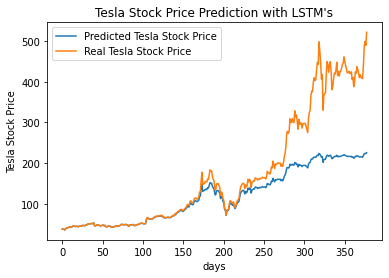

In [ ]:
plt.plot(stock_prediction, label = 'Predicted Tesla Stock Price')
plt.plot(df_test, label = 'Real Tesla Stock Price')
plt.title("Tesla Stock Price Prediction with LSTM's")
plt.xlabel('days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()